In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading

In [3]:
ttc = pd.read_csv("./data/ttc-bus-delay-data-2022.csv")
ttc

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-22,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,1-Jan-22,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,1-Jan-22,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,1-Jan-22,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,1-Jan-22,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0
...,...,...,...,...,...,...,...,...,...,...
27346,30-Jun-22,123,00:45,Thursday,SHERWAY GARDENS RD,Operations - Operator,27,54,E,8088
27347,30-Jun-22,102,01:08,Thursday,WARDEN AND DANFORTH,Operations - Operator,30,60,S,3416
27348,30-Jun-22,66,01:15,Thursday,UNKNOWN,Operations - Operator,30,30,NaN,0
27349,30-Jun-22,32,01:33,Thursday,RENFORTH STATION,Cleaning - Unsanitary,18,36,E,1202


In [4]:
ttc.isna().sum()

Date            0
Route         164
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    5577
Vehicle         0
dtype: int64

converting the date column into datetime

In [5]:
ttc["Date"] = pd.to_datetime(ttc["Date"])

/var/folders/rg/gd1ymgxd75d37gzf407p0kzc0000gn/T/ipykernel_17631/1955816524.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ttc["Date"] = pd.to_datetime(ttc["Date"])


### Data Cleaning / Data Manipulation

identifying the nulls on specific columns provided my the df.info() function

In [6]:
ttc[ttc["Direction"].isna()]

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
5,2022-01-01,363,02:16,Saturday,KING AND SHAW,Operations - Operator,30,60,NaN,0
7,2022-01-01,320,02:38,Saturday,STEELES AND YONGE,Operations - Operator,4,8,NaN,0
8,2022-01-01,320,02:55,Saturday,YONGE AND STEELES,Operations - Operator,4,8,NaN,0
13,2022-01-01,32,04:21,Saturday,EGLINTON STATION,Operations - Operator,16,33,NaN,1130
...,...,...,...,...,...,...,...,...,...,...
27338,2022-06-30,64,22:17,Thursday,MAIN ST STATION,Mechanical,23,44,NaN,8457
27339,2022-06-30,20,22:22,Thursday,MAIN STREET STATION,Utilized Off Route,22,46,NaN,8476
27340,2022-06-30,29,23:25,Thursday,WILSON STATION,Emergency Services,5,10,NaN,9080
27341,2022-06-30,35,23:57,Thursday,JANE STATION,Emergency Services,9,18,NaN,1036


vehicle number and direction seems not our priority for this dataset we will drop the following rows

In [7]:
ttc.drop(axis=1, columns=["Direction","Vehicle"],inplace=True)

we will check the null routes and where min delay and min gap is 0

In [8]:
ttc[ttc["Route"].isna()]

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap
369,2022-01-03,NaN,08:50,Monday,MCCAUL AND BALDWIN,Utilized Off Route,0,0
382,2022-01-03,NaN,09:51,Monday,MCNICOLL GARAGE,Operations - Operator,0,0
910,2022-01-05,NaN,12:24,Wednesday,1411 LAWRENCE AVE WEST,Utilized Off Route,0,0
1623,2022-01-07,NaN,20:09,Friday,WILSON GARAGE,Investigation,0,0
2089,2022-01-10,NaN,17:40,Monday,FINCH WEST STATION,Mechanical,12,24
...,...,...,...,...,...,...,...,...
26102,2022-06-22,NaN,19:28,Wednesday,KIPLING STATION,Emergency Services,0,0
26288,2022-06-23,NaN,21:51,Thursday,BIRCHMOUNT GARAGE,Collision - TTC,0,0
26634,2022-06-27,NaN,05:07,Monday,MOUNT DENNIS GARAGE,Emergency Services,0,0
26999,2022-06-29,NaN,10:06,Wednesday,HILLCREST COMPLEX,Collision - TTC,0,0


In [9]:
ttc[(ttc["Min Delay"] == 0) & (ttc["Min Gap"] == 0)]

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0
6,2022-01-01,96,02:18,Saturday,HUMBERLINE LOOP,Security,0,0
9,2022-01-01,300,03:18,Saturday,KENNEDY STATION,Emergency Services,0,0
14,2022-01-01,32,04:39,Saturday,YONGE AND BERWICK,Emergency Services,0,0
39,2022-01-01,29,08:50,Saturday,YONGE AND YORK MILLS,Emergency Services,0,0
...,...,...,...,...,...,...,...,...
26959,2022-06-29,332,04:44,Wednesday,EGLINTON STATION,Security,0,0
26999,2022-06-29,NaN,10:06,Wednesday,HILLCREST COMPLEX,Collision - TTC,0,0
27039,2022-06-29,NaN,14:03,Wednesday,BIRCHMOUNT DIVISION,Operations - Operator,0,0
27257,2022-06-30,129,15:24,Thursday,MCCOWAN AND FINCH,Security,0,0


I notice that where Route is null, the delay and gap is also 0.

we will drop the routes that are nulls and filter the incidents where min delay and gap is 0

In [10]:
ttc = ttc.copy()

ttc = ttc[ttc["Min Delay"] != 0]

In [11]:
ttc.dropna(inplace=True)

breakdown the Date column and make it into year, month, and day. then drop date column

In [12]:
ttc = ttc.copy()

ttc["Time"] = pd.to_datetime(ttc["Time"]).dt.time
ttc["Year"] = pd.to_datetime(ttc["Date"]).dt.year
ttc["Month"] = pd.to_datetime(ttc["Date"]).dt.month_name()

ttc.drop("Date", axis=1, inplace=True)

ttc.head()

/var/folders/rg/gd1ymgxd75d37gzf407p0kzc0000gn/T/ipykernel_17631/3829199405.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ttc["Time"] = pd.to_datetime(ttc["Time"]).dt.time


,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Year,Month
1,325,02:00:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,2022,January
2,320,02:00:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,2022,January
3,320,02:07:00,Saturday,YONGE AND STEELES,Operations - Operator,4,11,2022,January
4,320,02:13:00,Saturday,YONGE AND STEELES,Operations - Operator,4,8,2022,January
5,363,02:16:00,Saturday,KING AND SHAW,Operations - Operator,30,60,2022,January


In [13]:
ttc.head(1)

,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Year,Month
1,325,02:00:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,2022,January


### Data Visualization

Text(0.5, 0, 'Delay Time Duration(Hours)')

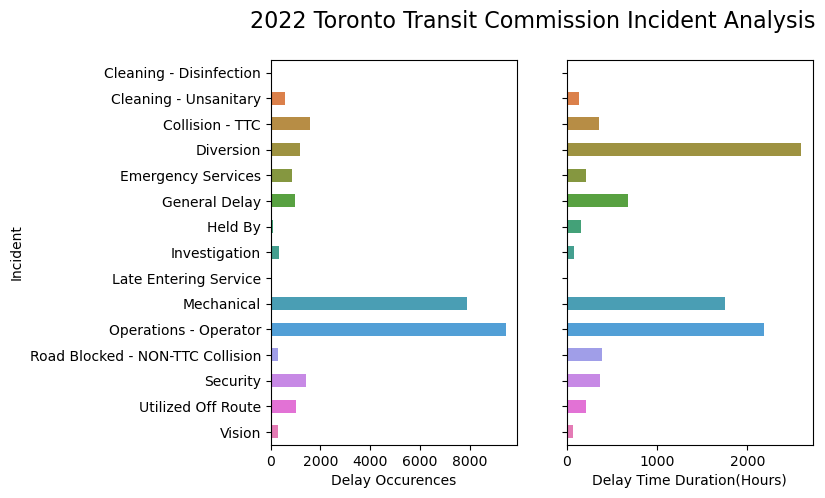

In [14]:
ttc_incident_count = ttc.groupby(["Incident"]).size().reset_index(name="Occurences")

ttc_incident_time = ttc.groupby(["Incident"])["Min Delay"].sum().reset_index(name="Min Delay")
ttc_incident_time["Min Delay"] = ttc_incident_time["Min Delay"] / 60 #convert from minutes to hour

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7,5), sharey=True)
fig.suptitle('2022 Toronto Transit Commission Incident Analysis', fontsize=16)

sns.barplot(
    data=ttc_incident_count,
    y="Incident",
    x="Occurences",
    width=0.5,
    hue="Incident",
    ax=ax1
)
ax1.set_xlabel("Delay Occurences")

sns.barplot(
    data=ttc_incident_time,
    y="Incident",
    x="Min Delay", 
    width=0.5 , 
    hue="Incident",
    ax=ax2,
)
ax2.set_xlabel("Delay Time Duration(Hours)")

Route ***Diversion*** Though the number occurences of Diversion incident is very small, it has a very high impact on delay times when it occurs. It contributes to TTC's delays totaling to more than 2500 hours of delays, These diversions cause delays in the service because of the bus taking a new route which can be longer or shorter than the normal route. 

Moreover, ***Operator*** and ***Mechanical*** delays have high occurences as per the first graph. Comparing it to the Delay Time graph it is both graph its at most likely thes same as more mechanical incidents affect the delay times, it is the same case also for operator incident.


/var/folders/rg/gd1ymgxd75d37gzf407p0kzc0000gn/T/ipykernel_17631/3802380262.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=330, horizontalalignment='left')
/var/folders/rg/gd1ymgxd75d37gzf407p0kzc0000gn/T/ipykernel_17631/3802380262.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=330, horizontalalignment='left')


[Text(0, 0, 'Lawrence West'),
 Text(1, 0, 'Finch West'),
 Text(2, 0, 'Eglinton West'),
 Text(3, 0, 'Yonge'),
 Text(4, 0, 'Dufferin'),
 Text(5, 0, 'Wilson West'),
 Text(6, 0, 'Lawrence East'),
 Text(7, 0, 'Landsdowne'),
 Text(8, 0, 'Ossington'),
 Text(9, 0, 'Glencairn')]

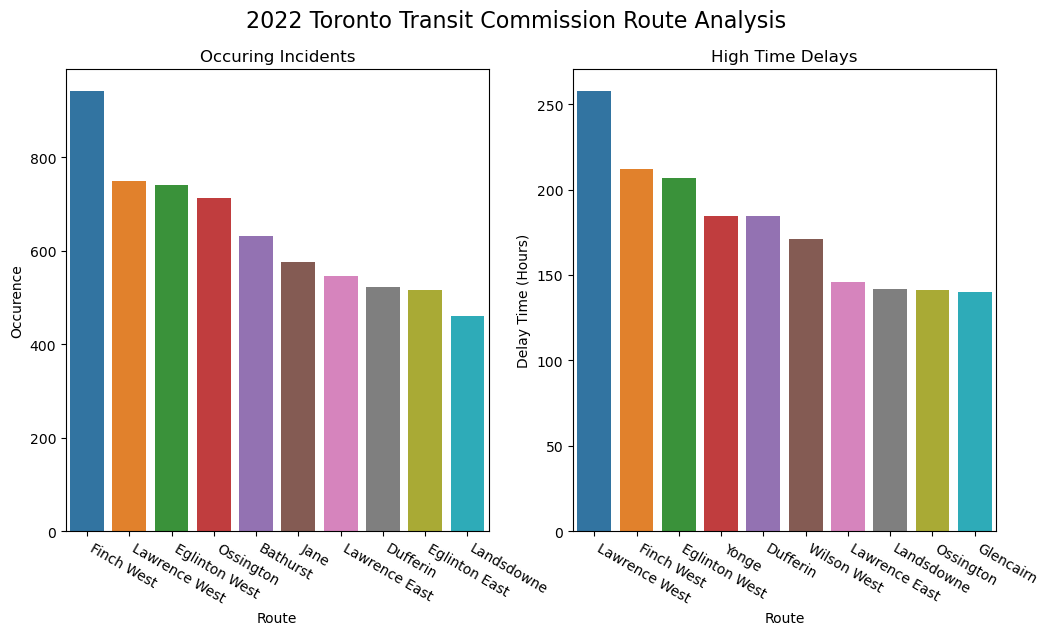

In [15]:
bus_route_incident_count = ttc.groupby(["Route"]).size().reset_index(name="Route Incident Occurence")
bus_route_incident_count.sort_values("Route Incident Occurence",ascending=False, inplace=True)
bus_route_incident_count.replace({
    "36":"Finch West", "32":"Eglinton West","52":"Lawrence West",
    "63":"Ossington","7":"Bathurst","35":"Jane","54":"Lawrence East",
    "29":"Dufferin","34":"Eglinton East","47":"Landsdowne"},
    inplace=True
)
bus_route_incident_count = bus_route_incident_count[:10] # get top 10 bus routes

bus_route_incident_time = ttc.groupby(["Route"])["Min Delay"].sum().reset_index(name="Min Delay") # total delay time is in minutes
bus_route_incident_time.sort_values("Min Delay",ascending=False, inplace=True)
bus_route_incident_time["Min Delay"] = bus_route_incident_time["Min Delay"] / 60 #convert minutes to hours
bus_route_incident_time.replace({
    "36":"Finch West", "32":"Eglinton West","52":"Lawrence West",
    "63":"Ossington","97":"Yonge","96":"Wilson West","54":"Lawrence East",
    "29":"Dufferin","14":"Glencairn","47":"Landsdowne"},
    inplace=True
)
bus_route_incident_time = bus_route_incident_time[:10]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
fig.suptitle('2022 Toronto Transit Commission Route Analysis', fontsize=16)

sns.barplot(
    data=bus_route_incident_count,
    x="Route",
    y="Route Incident Occurence", 
    hue="Route",
    ax=ax1
)
ax1.set_title("Occuring Incidents")
ax1.set_ylabel("Occurence")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=330, horizontalalignment='left')


sns.barplot(
    data=bus_route_incident_time,
    x="Route",
    y="Min Delay", 
    hue="Route",
    ax=ax2
)
ax2.set_title("High Time Delays")
ax2.set_ylabel("Delay Time (Hours)")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=330, horizontalalignment='left')

In both graphs, routes Lawrence West, Finch West, and Eglinton West are the top 3 routes in terms of having the most delay incident occurences. Moreover, these routes experience significantly more delays compared to others in the system. However, after these three routes, the rankings diverge in each graph, indicating that the severity and frequency of delays vary depending on the specific metrics being analyzed.

/var/folders/rg/gd1ymgxd75d37gzf407p0kzc0000gn/T/ipykernel_17631/1686468253.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=330, horizontalalignment='left')
/var/folders/rg/gd1ymgxd75d37gzf407p0kzc0000gn/T/ipykernel_17631/1686468253.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=330, horizontalalignment='left')


[Text(0, 0, 'KIPLING STATION'),
 Text(1, 0, 'EGLINTON STATION'),
 Text(2, 0, 'KENNEDY STATION'),
 Text(3, 0, 'PIONEER VILLAGE STATIO'),
 Text(4, 0, 'WILSON STATION'),
 Text(5, 0, 'LAWRENCE WEST STATION'),
 Text(6, 0, 'FINCH STATION'),
 Text(7, 0, 'YORK MILLS STATION'),
 Text(8, 0, 'SHEPPARD WEST STATION'),
 Text(9, 0, 'ISLINGTON STATION')]

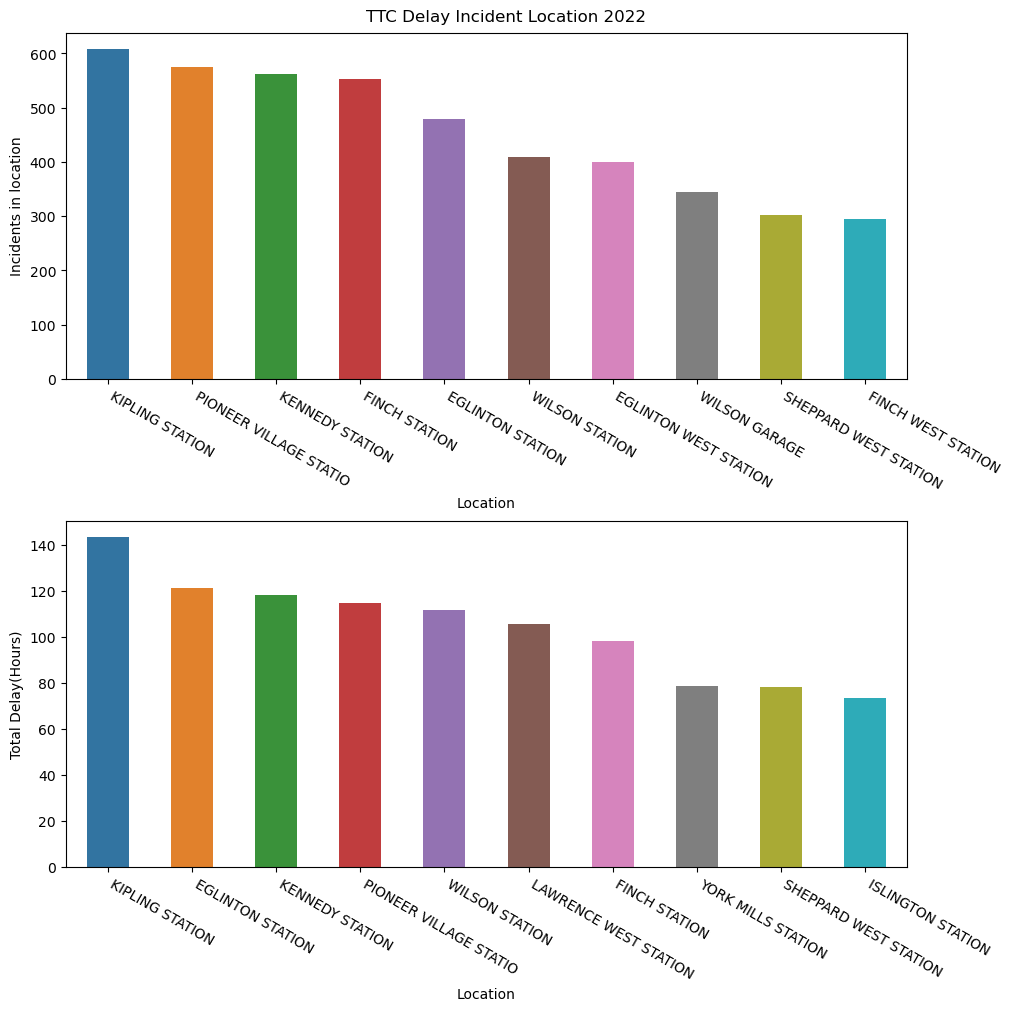

In [16]:
location_delay = ttc.groupby(["Location"]).size().reset_index(name="Incidents in location")
location_delay = location_delay.sort_values("Incidents in location",ascending=False)
location_delay = location_delay[:10]

location_time_delay = ttc.groupby(["Location"])["Min Delay"].sum().reset_index(name="Min Delay") # total min delay 
location_time_delay["Min Delay"] = location_time_delay["Min Delay"] / 60 # mins to hour
location_time_delay = location_time_delay.sort_values("Min Delay",ascending=False)
location_time_delay = location_time_delay[:10]

location_time_delay
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,10), constrained_layout=True)

sns.barplot(
    data=location_delay,
    x="Location",
    y="Incidents in location",
    hue="Location",
    width=0.5,
    ax=ax1,
)

sns.barplot(
    data=location_time_delay,
    x="Location",
    y="Min Delay",
    hue="Location",
    width=0.5,
    ax=ax2,
)
ax2.set_ylabel("Total Delay(Hours)")


fig.suptitle("TTC Delay Incident Location 2022")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=330, horizontalalignment='left')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=330, horizontalalignment='left')


In both graphs, Kipling Station stands out as the location with the highest number of delay incidents as well as the longest cumulative delay times. This indicates that not only are disruptions more frequent at Kipling compared to other locations, but the disruptions also tend to last longer, contributing to significant delays across the transit network.

In [17]:
ttc_incidents_month = ttc.groupby(["Month"]).size().reset_index(name="Delay Incident Percentage")

ttc_incidents_month["Delay Incident Percentage"] = (ttc_incidents_month["Delay Incident Percentage"] / ttc_incidents_month["Delay Incident Percentage"].sum()) * 100

max_pct_month = ttc_incidents_month["Delay Incident Percentage"].idxmax()

explode_month = [0] * len(ttc_incidents_month["Delay Incident Percentage"])

explode_month[max_pct_month] = 0.2

In [28]:
ttc_incidents_month_time = ttc.groupby(["Month"])["Min Delay"].sum().reset_index(name="Delay Time Percentage")

ttc_incidents_month_time["Delay Time Percentage"] = (ttc_incidents_month_time["Delay Time Percentage"] / ttc_incidents_month_time["Delay Time Percentage"].sum()) * 100

max_pct_time = ttc_incidents_month_time["Delay Time Percentage"].idxmax()

explode_time = [0] * len(ttc_incidents_month_time["Delay Time Percentage"])

explode_time[max_pct_time] = 0.2

Text(0.5, 1.0, 'Delay Time Percentage of Each Month in 2022')

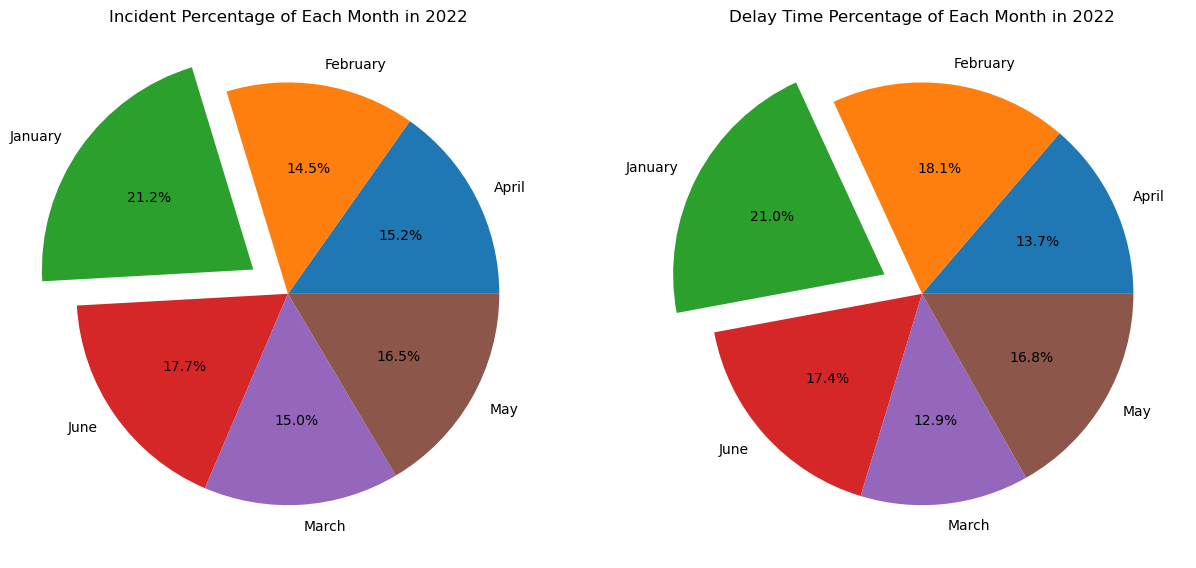

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

ax1.pie(
    x=ttc_incidents_month["Delay Incident Percentage"],
    explode=explode_month,
    labels=ttc_incidents_month["Month"],
    autopct='%1.1f%%',
)
ax1.set_title("Incident Percentage of Each Month in 2022")

ax2.pie(
    x=ttc_incidents_month_time["Delay Time Percentage"],
    explode=explode_time,
    labels=ttc_incidents_month_time["Month"],
    autopct='%1.1f%%'
)
ax2.set_title("Delay Time Percentage of Each Month in 2022")

***January*** has the highest incident percentage(21.2%) and Delay Time Percentage(21.0) of TTC's service delays in 2022, We can infer that the cause of the delays during this month is because of the winter season. Because of the dangerous conditions in the winter season, many accidents that happen during this month which mean TTC drivers have to drive cautiously and slowly to be safe and avoid accidents which results on delay incidents during this month.